<a href="https://colab.research.google.com/github/Suriya6744/Project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

##PTT

In [ ]:
import pandas as pd

In [ ]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')
ptt.shape

(241, 7)

In [ ]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,38.00,38.25,38.50,38.00,59.50M,0.00%
1,5/1/2022,39.00,38.25,39.00,38.00,76.59M,2.63%
2,6/1/2022,38.00,38.50,38.75,38.00,71.68M,-2.56%
3,7/1/2022,38.75,38.50,38.75,38.25,59.56M,1.97%
4,10/1/2022,38.50,38.75,38.75,38.00,34.79M,-0.65%


In [ ]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [ ]:
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
ptt

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,38.00,59.50M
1,5/1/2022,39.00,76.59M
2,6/1/2022,38.00,71.68M
3,7/1/2022,38.75,59.56M
4,10/1/2022,38.50,34.79M
...,...,...,...
236,26/12/2022,32.25,39.66M
237,27/12/2022,32.50,80.79M
238,28/12/2022,32.75,49.82M
239,29/12/2022,32.75,61.35M


In [ ]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)


In [ ]:
ptt.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [ ]:
ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)

In [ ]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

In [ ]:
# สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
    return value * 1000000

In [ ]:
# ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)


In [ ]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)
ptt

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


In [ ]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt

,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


##SCG

In [ ]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')
scg.shape


(241, 7)

In [ ]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [ ]:
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]
scg

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,6.15,183.00K
1,5/1/2022,6.25,1.15M
2,6/1/2022,6.10,133.50K
3,7/1/2022,6.10,205.10K
4,10/1/2022,6.15,144.40K
...,...,...,...
236,26/12/2022,4.80,37.00K
237,27/12/2022,4.84,62.50K
238,28/12/2022,4.86,41.50K
239,29/12/2022,4.88,47.90K


In [ ]:
#scg['ปริมาณ']=scg['ปริมาณ'].astype(str)

In [ ]:
scg.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [ ]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


In [ ]:
scg['ปริมาณ']=scg['ปริมาณ'].astype(int)
scg


,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


In [ ]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

,date,cp_scg,vol_scg
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


##SOLAR

In [ ]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')
solar.shape


(241, 7)

In [ ]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [ ]:
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]
solar

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,1.51,9.13M
1,5/1/2022,1.51,4.25M
2,6/1/2022,1.44,9.95M
3,7/1/2022,1.24,93.48M
4,10/1/2022,1.24,21.28M
...,...,...,...
236,26/12/2022,0.87,1.06M
237,27/12/2022,0.89,1.46M
238,28/12/2022,0.88,291.80K
239,29/12/2022,0.88,1.05M


In [ ]:
solar.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [ ]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


In [ ]:
solar['ปริมาณ']=solar['ปริมาณ'].astype(int)
solar


,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


In [ ]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

,date,cp_solar,vol_solar
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


##USD

In [ ]:
usd = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')
usd.shape

(260, 7)

In [ ]:
usd.head()


,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,33.24,33.24,33.370,33.130,NaN,0.03%
1,4/1/2022,33.25,33.24,33.365,33.225,NaN,0.03%
2,5/1/2022,33.19,33.26,33.290,33.120,NaN,-0.18%
3,6/1/2022,33.55,33.21,33.595,33.210,NaN,1.08%
4,7/1/2022,33.62,33.56,33.740,33.470,NaN,0.21%


In [ ]:
usd=usd[['วันเดือนปี','ล่าสุด']]
usd

,วันเดือนปี,ล่าสุด
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


In [ ]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
usd =usd .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_usd'})
usd

,date,cp_usd
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


##WTI

In [ ]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')
wti.shape

(310, 7)

In [ ]:
wti=wti[['วันเดือนปี','ล่าสุด']]
wti

,วันเดือนปี,ล่าสุด
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


In [ ]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


##XAU

In [ ]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')
xau.shape

(260, 7)

In [ ]:
xau=xau[['วันเดือนปี','ล่าสุด']]
xau

,วันเดือนปี,ล่าสุด
0,3/1/2022,"1,800.85"
1,4/1/2022,"1,814.56"
2,5/1/2022,"1,809.53"
3,6/1/2022,"1,788.68"
4,7/1/2022,"1,795.63"
...,...,...
255,26/12/2022,"1,797.61"
256,27/12/2022,"1,813.93"
257,28/12/2022,"1,804.09"
258,29/12/2022,"1,814.89"


In [ ]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau

,date,cp_xau
0,3/1/2022,"1,800.85"
1,4/1/2022,"1,814.56"
2,5/1/2022,"1,809.53"
3,6/1/2022,"1,788.68"
4,7/1/2022,"1,795.63"
...,...,...
255,26/12/2022,"1,797.61"
256,27/12/2022,"1,813.93"
257,28/12/2022,"1,804.09"
258,29/12/2022,"1,814.89"


#Merge

In [ ]:
tm1 = wti.merge(usd, how ='left', left_on=['date',], right_on=['date',])
tm1

,date,cp_wti,cp_usd
0,2/1/2022,76.03,NaN
1,3/1/2022,76.17,33.24
2,4/1/2022,77.25,33.25
3,5/1/2022,77.39,33.19
4,6/1/2022,79.69,33.55
...,...,...,...
305,26/12/2022,81.06,34.69
306,27/12/2022,79.84,34.60
307,28/12/2022,78.67,34.78
308,29/12/2022,78.67,34.62


In [ ]:
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm2

,date,cp_wti,cp_usd,cp_xau
0,2/1/2022,76.03,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85"
2,4/1/2022,77.25,33.25,"1,814.56"
3,5/1/2022,77.39,33.19,"1,809.53"
4,6/1/2022,79.69,33.55,"1,788.68"
...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61"
306,27/12/2022,79.84,34.60,"1,813.93"
307,28/12/2022,78.67,34.78,"1,804.09"
308,29/12/2022,78.67,34.62,"1,814.89"


In [ ]:
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm3

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt
0,2/1/2022,76.03,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0
...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0


In [ ]:
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm4

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0
...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0


In [ ]:
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm5

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN,NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [ ]:
tm5.isnull().any()

date         False
cp_wti       False
cp_usd        True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [ ]:
all_data= tm5.dropna()
all_data


,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7/1/2022,79.07,33.62,"1,795.63",38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10/1/2022,78.70,33.62,"1,801.41",38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [ ]:
all_data['cp_xau'] = all_data['cp_xau'].str.replace(',', '').astype(float)

<ipython-input-624-9b1f2f07f0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_xau'] = all_data['cp_xau'].str.replace(',', '').astype(float)


In [ ]:
all_data['date'] = all_data['date'].str.replace('/', '-')

<ipython-input-625-f8a975dcb8ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['date'] = all_data['date'].str.replace('/', '-')


In [ ]:
# save data
#all_data.to_csv('Project_data.csv', index=False)


#XGBoost Model

In [ ]:
all_data


,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4-1-2022,77.25,33.25,1814.56,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,77.39,33.19,1809.53,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,79.69,33.55,1788.68,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7-1-2022,79.07,33.62,1795.63,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10-1-2022,78.70,33.62,1801.41,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,81.06,34.69,1797.61,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,79.84,34.60,1813.93,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,78.67,34.78,1804.09,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,78.67,34.62,1814.89,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


##หาพารามิเตอร์ที่เหมาะสมกับโมเดล

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = all_data[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = all_data['cp_ptt']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 150
Best max_depth: 9


In [ ]:
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=150,  # You can adjust other parameters here
        max_depth=9,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 62.276468163032625
Learning Rate: 0.1, Mean Squared Error: 1.1670358187310534
Learning Rate: 0.2, Mean Squared Error: 1.0935555170549285
Learning Rate: 0.3, Mean Squared Error: 1.276805929511599
Learning Rate: 0.4, Mean Squared Error: 1.2923761166470917


Mean Squared Error: 1.2609364161562182


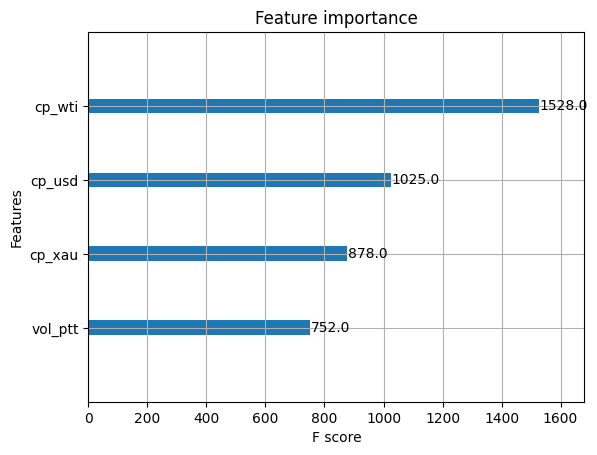

In [ ]:
X = all_data[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = all_data['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=150,
    max_depth=9,
    learning_rate=0.2,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance analysis (optional)
plot_importance(model)
plt.show()


##กราฟเปรียบเทียบค่าพยากรณ์กับค่าจริง

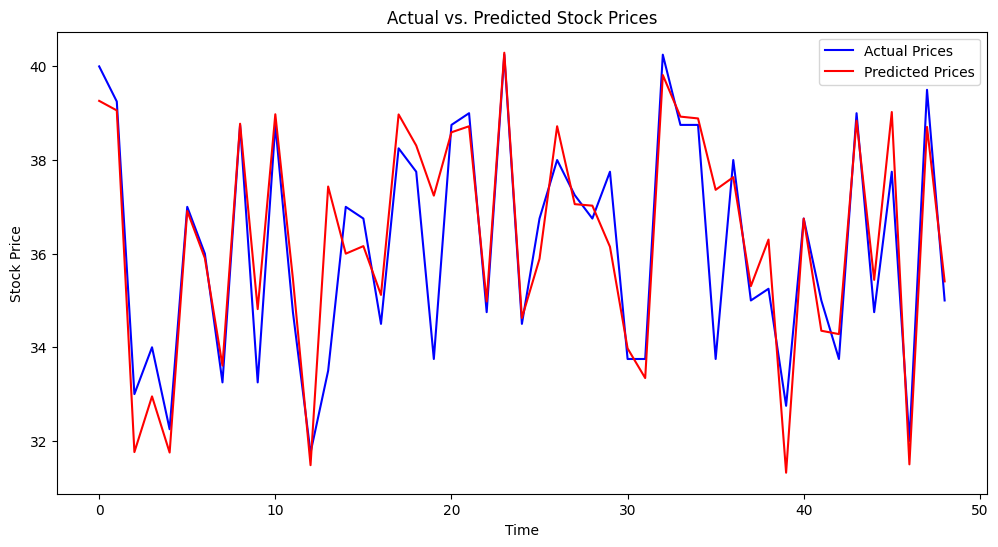

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

In [ ]:
y_test


In [ ]:
y_pred


#LSTM Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# เลือกคอลัมน์ที่ใช้ในการฝึกโมเดล
data = all_data[['cp_wti', 'cp_usd','vol_ptt', 'cp_ptt']]
data

,cp_wti,cp_usd,vol_ptt,cp_ptt
2,77.25,33.25,59500000.0,38.00
3,77.39,33.19,76590000.0,39.00
4,79.69,33.55,71680000.0,38.00
5,79.07,33.62,59560000.0,38.75
7,78.70,33.62,34790000.0,38.50
...,...,...,...,...
305,81.06,34.69,39660000.0,32.25
306,79.84,34.60,80790000.0,32.50
307,78.67,34.78,49820000.0,32.75
308,78.67,34.62,61350000.0,32.75


In [ ]:
# แปลงข้อมูลให้อยู่ในช่วง 0-1 โดยใช้ Min-Max Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# สร้างชุดข้อมูลสำหรับการฝึกและทดสอบ
sequence_length = 2  # ยาวของ sequence
X = []
y = []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length][2])

X = np.array(X)
y = np.array(y)

In [ ]:
# แบ่งชุดข้อมูลเป็นชุดการฝึกและชุดการทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# สร้างโมเดล LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 4)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [ ]:
# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# ฝึกโมเดล
model.fit(X_train, y_train, epochs=30, batch_size=32)

In [ ]:
# ทดสอบโมเดล
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 6ms/step


In [ ]:
# แปลงผลลัพธ์กลับไปเป็นสเกลและเก็บในตัวแปร df
y_pred_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))
df = pd.DataFrame(y_pred_inverse, columns=['cp_wti',	'cp_usd',	'vol_ptt','cp_ptt_pred'])

